<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/4_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification
- In this notebook we will use the MNIST dataset to train a neural network to classify handwritten digits.

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# make plt grayscale as default
plt.rcParams['image.cmap'] = 'gray'

DEV = 'cuda' # Use GPU # library for NVIDIA GPU
assert torch.cuda.is_available(), "Make sure you run this Colab in GPU"

## 0. Download Dataset

In [3]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 5694206.97it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1366803.50it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1347145.37it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15862222.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# See how our data looks like
# you can get the i-th data from the dataset class using dataset[i]
train_data[0] # this will return (image tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
# img, label = train_data[0] # A datasample is a pair of image and label
img = train_data[0][0]
label = train_data[0][1]

In [ ]:
print(img.shape)
img

In [ ]:
# you can delete axis that has only one item by squeeze
img = img.squeeze() # or img = img[0] or img = img[0, :, : ]
print(img.shape)
img

In [20]:
len(train_data) # number of samples in the dataset

60000

Label is 8


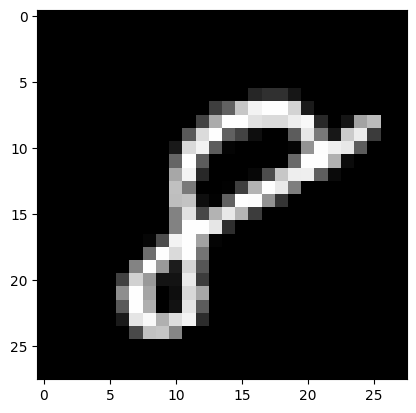

In [23]:
data_idx = 59999
# You can load the data sample from the dataset, using [idx]
img, label = train_data[data_idx] # get the data_idx-th sample from the train_data
img = img.squeeze()

plt.imshow(img), # plt.imshow visualize 2D image
print(f'Label is {label}') # f means formatted string

In [ ]:
# how many data exists in our train_data?
len(train_data)

60000

In [25]:
img.shape

torch.Size([28, 28])

In [30]:
# We have to convert a tensor of 28, 28 to a tensor of 784
flattened_img = img.reshape(784)
flattened_img.shape
# we can reshape a tensor to have a specific shape

# -1 automatically decide the size of that dimension
print(flattened_img.numel())
flattened_img = img.reshape(-1)
flattened_img.shape

784


torch.Size([784])

In [39]:
# reshape (-1) examples
test_img = img.reshape(4, 7, -1)

In [ ]:
# reshape is a function that converts a shape of tensor into specific shape


In [40]:
# let's collect 1000 data from train_data

imgs = []
labels = []

for i in range(1000):
  data_sample = train_data[i]
  img, label = data_sample
  imgs.append(img)
  labels.append(label)

In [44]:
# imgs is a list of tensor
type(imgs), type(imgs[0])
# we want to convert a list of tensor to a single tensor

(list, torch.Tensor)

In [45]:
# two ways to convert a list of tensor to a single tensor
# torch.cat() concatenates a list of tensor to an existing dim
# torch.stack() concatenates a list of tensor to a new dim
torch.cat(imgs).shape, torch.stack(imgs).shape

(torch.Size([1000, 28, 28]), torch.Size([1000, 1, 28, 28]))

In [47]:
out = torch.stack(imgs)
out.shape

torch.Size([1000, 1, 28, 28])

In [ ]:
(out[100] == imgs[100]).all()

tensor(True)

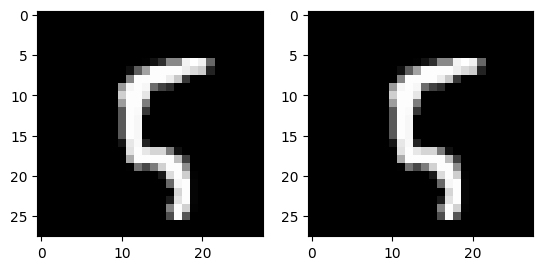

In [50]:
plt.subplot(1, 2, 1) # use 1 row, 2 column, and use 1st place
plt.imshow(out[100].squeeze())
plt.subplot(1,2,2)
plt.imshow(imgs[100].squeeze())

In [51]:
# flatten that out tensor so that each datasample has 784 numbers

# data_tensor = out.reshape(1000, 784)
data_tensor = out.reshape(-1, 784)
data_tensor.shape

torch.Size([1000, 784])

#### Extra: Practice on Reshape

In [ ]:
# what is difference between reshape(1000, 784) and reshape(784, 1000)
test = torch.arange(784).repeat(1000, 1)
test, test.shape

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]), torch.Size([1000, 784]))

In [ ]:
test_flattened = test.reshape(-1) # 784000 dim vector
test_flattened.shape

torch.Size([784000])

In [ ]:
reshaped_a = test_flattened.reshape(1000, 784)
reshaped_b = test_flattened.reshape(784, 1000)
reshaped_a, reshaped_b

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 tensor([[  0,   1,   2,  ..., 213, 214, 215],
         [216, 217, 218,  ..., 429, 430, 431],
         [432, 433, 434,  ..., 645, 646, 647],
         ...,
         [136, 137, 138,  ..., 349, 350, 351],
         [352, 353, 354,  ..., 565, 566, 567],
         [568, 569, 570,  ..., 781, 782, 783]]))

In [ ]:
dummy = torch.arange(12)
print(dummy)
print(dummy.reshape(3,4))
print(dummy.reshape(4,3))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
label_tensor = torch.tensor(label_list)
flattened_data.shape, label_tensor.shape

(torch.Size([1000, 784]), torch.Size([1000]))

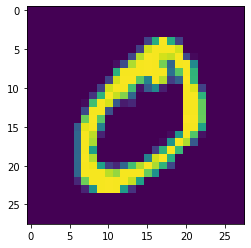

In [ ]:
first_data = flattened_data[1]
plt.imshow(first_data.reshape(28, 28))

In [ ]:
first_data.shape, first_data

(torch.Size([784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        

## 1. Make a Model

In [57]:
class Classifier(nn.Module):
  def __init__(self, input_dim=784, num_class=10):
    super().__init__()
    # Let's make three layer models

    # What we know: input_dim = 784
    # number_of_categories = 10
    hidden_dim = 64
    hidden_dim2 = 32

    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, hidden_dim2)
    self.layer3 = nn.Linear(hidden_dim2, num_class)
    # self.layer = nn.Linear(784, 123)

  def forward(self, x): # x is an input
    # x is a tensor with a shape of [Num samples, 784]

    # we want to predict the probability of each category label for a given input
    # we have 10 different categories in our dataset

    x = self.layer1(x)
    x = x.relu()
    x = self.layer2(x)
    x = x.relu()
    x = self.layer3(x)

    return x


model = Classifier()
data_tensor.shape

torch.set_printoptions(sci_mode=False)
pred = model(data_tensor)
pred.shape, pred[:10]

(torch.Size([1000, 10]),
 tensor([[ 0.0255,  0.0273, -0.0120,  0.0010,  0.0999,  0.1252, -0.0523, -0.0335,
           0.0662,  0.0584],
         [ 0.0306,  0.0535,  0.0056, -0.0158,  0.0800,  0.0918, -0.0419, -0.0668,
           0.0600,  0.0784],
         [ 0.0386,  0.0157, -0.0184, -0.0340,  0.1075,  0.1211, -0.0583, -0.0637,
           0.0722,  0.1043],
         [ 0.0513,  0.0094, -0.0428, -0.0297,  0.0989,  0.1149, -0.0369, -0.0676,
           0.0385,  0.0886],
         [ 0.0620,  0.0428, -0.0114, -0.0348,  0.0770,  0.0841, -0.0366, -0.0594,
           0.0526,  0.0913],
         [ 0.0308,  0.0158, -0.0134, -0.0135,  0.0837,  0.0923, -0.0360, -0.0422,
           0.0374,  0.0886],
         [ 0.0207, -0.0083, -0.0203, -0.0278,  0.0985,  0.1021, -0.0166, -0.0583,
           0.0378,  0.0981],
         [ 0.0415,  0.0101,  0.0096,  0.0051,  0.1270,  0.1153, -0.0481, -0.0655,
           0.0652,  0.0516],
         [ 0.0187, -0.0086, -0.0238, -0.0394,  0.0983,  0.0905, -0.0036, -0.0613,
     

In [ ]:
# We want to convert the output into a range of probability
# Why we use softmax function

tensor([0.0846, 0.1040, 0.1133, 0.0894, 0.1001, 0.1014, 0.1065, 0.1030, 0.0938,
        0.1038], grad_fn=<SoftmaxBackward0>)

## 1.1 Make Softmax

In [66]:
torch.set_printoptions(sci_mode=False)
def my_softmax(x, dim=0):
  exp_x = torch.exp(x)
  return exp_x / torch.sum(exp_x, dim=1, keepdim=True)
my_softmax(pred, dim=1)

tensor([[0.0993, 0.0995, 0.0957,  ..., 0.0937, 0.1035, 0.1027],
        [0.1002, 0.1025, 0.0977,  ..., 0.0909, 0.1032, 0.1051],
        [0.1008, 0.0985, 0.0952,  ..., 0.0910, 0.1042, 0.1076],
        ...,
        [0.1002, 0.0997, 0.0981,  ..., 0.0896, 0.1042, 0.1063],
        [0.1016, 0.1003, 0.0954,  ..., 0.0924, 0.1023, 0.1082],
        [0.1025, 0.1017, 0.0939,  ..., 0.0914, 0.1027, 0.1064]],
       grad_fn=<DivBackward0>)

In [67]:
pred.softmax(dim=1)

tensor([[0.0993, 0.0995, 0.0957,  ..., 0.0937, 0.1035, 0.1027],
        [0.1002, 0.1025, 0.0977,  ..., 0.0909, 0.1032, 0.1051],
        [0.1008, 0.0985, 0.0952,  ..., 0.0910, 0.1042, 0.1076],
        ...,
        [0.1002, 0.0997, 0.0981,  ..., 0.0896, 0.1042, 0.1063],
        [0.1016, 0.1003, 0.0954,  ..., 0.0924, 0.1023, 0.1082],
        [0.1025, 0.1017, 0.0939,  ..., 0.0914, 0.1027, 0.1064]],
       grad_fn=<SoftmaxBackward0>)

In [65]:
test = pred[:3]
print(test)
print(torch.exp(test))
print(torch.exp(test).sum(dim=1, keepdim=True))

tensor([[ 0.0255,  0.0273, -0.0120,  0.0010,  0.0999,  0.1252, -0.0523, -0.0335,
          0.0662,  0.0584],
        [ 0.0306,  0.0535,  0.0056, -0.0158,  0.0800,  0.0918, -0.0419, -0.0668,
          0.0600,  0.0784],
        [ 0.0386,  0.0157, -0.0184, -0.0340,  0.1075,  0.1211, -0.0583, -0.0637,
          0.0722,  0.1043]], grad_fn=<SliceBackward0>)
tensor([[1.0258, 1.0277, 0.9880, 1.0010, 1.1050, 1.1334, 0.9490, 0.9671, 1.0684,
         1.0601],
        [1.0310, 1.0550, 1.0056, 0.9844, 1.0833, 1.0962, 0.9590, 0.9354, 1.0619,
         1.0816],
        [1.0394, 1.0159, 0.9818, 0.9665, 1.1135, 1.1288, 0.9434, 0.9382, 1.0749,
         1.1099]], grad_fn=<ExpBackward0>)
tensor([[10.3256],
        [10.2933],
        [10.3122]], grad_fn=<SumBackward1>)
